In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

dataset = pd.read_csv('Default.csv', index_col=0)
dataset['default1'] = dataset.default.factorize()[0]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   default   10000 non-null  object 
 1   student   10000 non-null  object 
 2   balance   10000 non-null  float64
 3   income    10000 non-null  float64
 4   default1  10000 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 468.8+ KB


In [2]:
dataset.describe()

,balance,income,default1
count,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.033300
std,483.714985,13336.639563,0.179428
min,0.000000,771.967729,0.000000
25%,481.731105,21340.462903,0.000000
50%,823.636973,34552.644802,0.000000
75%,1166.308386,43807.729272,0.000000
max,2654.322576,73554.233495,1.000000


In [3]:
dataset.head()

,default,student,balance,income,default1
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [57]:
X = sm.add_constant(dataset[['balance', 'income']])
y = dataset.default1

#Validation set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

pred = clf.predict(X_test)
print("Validation set MSE: " + str(mean_squared_error(y_test, pred)))

Validation set MSE: 0.0322


In [38]:
#LOOCV
p_order = np.arange(1,11)
r_state = np.arange(0,10)

regr = skl_lm.LogisticRegression()
loo = LeaveOneOut()
loo.get_n_splits(dataset)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = np.array([poly.fit_transform(dataset.balance.values.reshape(-1,1)), poly.fit_transform(dataset.income.values.reshape(-1,1))])
    X_poly = X_poly[1::]
    X_poly = list(X_poly.transpose().reshape(10000, 2))
    score = cross_val_score(regr, X_poly, y, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

10000
10000


KeyboardInterrupt: 

In [99]:
# k-fold CV
regr = skl_lm.LogisticRegression()
X = sm.add_constant(dataset[['balance', 'income']])
y = dataset['default1']
i = 2000
j = 0

while(i < 10000):
    X_test = np.array(X[j:i])
    y_test = y[j:i]
    X_train = X[:2000]
    y_train = y[i:-j]
    print(X_test.shape)
    print(X_train)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    pred = clf.predict(X_test)
    print("Validation set MSE: " + str(mean_squared_error(y_test, pred)))
    i = i + 2000
    j = j + 2000

(2000, 3)
      const      balance        income
1       1.0   729.526495  44361.625074
2       1.0   817.180407  12106.134700
3       1.0  1073.549164  31767.138947
4       1.0   529.250605  35704.493935
5       1.0   785.655883  38463.495879
...     ...          ...           ...
1996    1.0  1105.925571  13126.214243
1997    1.0     0.000000  47592.728137
1998    1.0   815.737668  48788.103340
1999    1.0   568.629894  28122.594088
2000    1.0   589.944419  24854.604583

[2000 rows x 3 columns]


ValueError: Found input variables with inconsistent numbers of samples: [2000, 0]

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

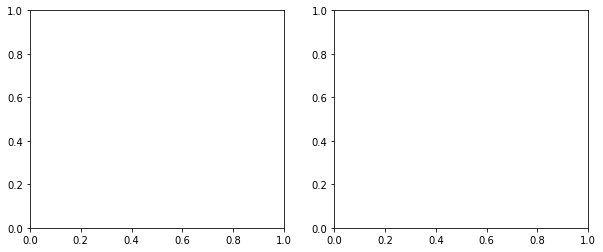

In [48]:
#Visualizing the results. **Taken from github.com/JWarmenhoven/ISLR-python**
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# Right plot
ax2.plot(X,Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));